In [1]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

from openpyxl import load_workbook

# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (7.0, 5.0)

In [2]:
def plot_Matrix(cm, classes, title=None,  cmap=plt.cm.Blues):
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(im, ax = ax) # 侧边的颜色条带
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='真实值',
           xlabel='预测值')

    # 通过绘制格网，模拟每个单元格的边框
    ax.set_xticks(np.arange(cm.shape[1] + 1) - .5, minor=True)
    ax.set_yticks(np.arange(cm.shape[0] + 1) - .5, minor=True)
#     ax.grid(which = "minor", color = "gray", linestyle = '-', linewidth = 0.2)
    ax.tick_params(which="minor", bottom=False, left=False)

    # 将x轴上的lables旋转45度
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # 标注百分比信息
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), 
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('真实值')
    plt.xlabel('预测值')
    plt.savefig('confusion_matrix.svg', dpi=256)

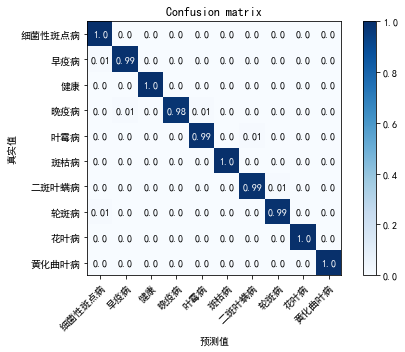

In [3]:
wb = load_workbook('../confusion_matrix.xlsx')
sheet = wb['Sheet1']
wb.close()
array = []
for row in sheet['A1:K11']:
    _row = []
    for cell in row:
        _row.append(cell.value)
    array.append(_row)
# 类别
classes = array.pop(0)
classes.pop(0)
# 去除矩阵其他值
cm = []
for row in array:
    row.pop(0)
    _row = []
    for cell in row:
        _row.append(float(cell))
    cm.append(_row)
cm = np.array(cm)

plot_Matrix(cm, classes, title="Confusion matrix")